<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/Turma02/FG_Atividade02_Turma02_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats

In [2]:
# Dados dos resistores para análise estatística
dados_resistores = {
    # Bernardo Torres Pereira e Daniel (33k ±5% Ohms)
    "Bernardo_33k": {
        "valor_nominal": 33.0,
        "tolerancia": 0.05,  # 5%
        "grupos": {
            "GR01": [32.2, 32.5, 32.3, 32.7, 32.2, 32.3, 32.4, 32.1, 32.3, 32.1, 32.0, 32.3, 32.6, 32.4, 32.2, 32.0, 32.1, 32.5, 32.4, 32.1],
            "GR02": [32.2, 32.0, 32.5, 32.4, 32.5, 32.3, 32.6, 32.3, 32.3, 32.2, 32.5, 32.4, 32.5, 32.4, 32.5, 32.5, 32.4, 32.3, 32.3, 32.3],
            "GR03": [32.6, 32.2, 32.3, 32.5, 32.3, 32.3, 32.6, 32.2, 32.2, 32.4, 32.0, 32.7, 32.2, 32.0, 32.4, 32.1, 32.5, 32.3, 32.2, 32.0],
            "GR04": [32.4, 32.5, 32.4, 32.3, 32.7, 32.2, 32.5, 32.4, 32.7, 31.7, 32.4, 32.5, 32.3, 32.3, 32.5, 32.2, 32.4, 32.1, 32.7, 32.3],
            "GR05": [32.5, 32.3, 32.2, 32.3, 32.3, 32.2, 32.4, 32.7, 32.1, 32.2, 32.2, 32.3, 32.2, 32.3, 32.5, 32.1, 32.0, 32.3, 32.5, 32.4]
        }
    },

    # Júlia Jesus Santos Coutinho Pires e Davi (4.7k ±5% Ohms)
    "Julia_4.7k": {
        "valor_nominal": 4.7,
        "tolerancia": 0.05,
        "grupos": {
            "GR01": [4.59, 4.57, 4.60, 4.60, 4.61, 4.63, 4.60, 4.62, 4.60, 4.59, 4.63, 4.60, 4.58, 4.61, 4.62, 4.59, 4.60, 4.62, 4.59, 4.59],
            "GR02": [4.58, 4.60, 4.60, 4.61, 4.59, 4.61, 4.61, 4.61, 4.59, 4.58, 4.61, 4.63, 4.61, 4.65, 4.64, 4.59, 4.59, 4.62, 4.59, 4.61],
            "GR03": [4.63, 4.60, 4.64, 4.62, 4.61, 4.62, 4.61, 4.59, 4.63, 4.61, 4.62, 4.62, 4.57, 4.59, 4.62, 4.59, 4.58, 4.59, 4.62, 4.59],
            "GR04": [4.59, 4.61, 4.59, 4.61, 4.59, 4.61, 4.64, 4.62, 4.61, 4.60, 4.59, 4.60, 4.59, 4.62, 4.64, 4.59, 4.60, 4.61, 4.61, 4.59],
            "GR05": [4.59, 4.58, 4.63, 4.60, 4.59, 4.60, 4.60, 4.60, 4.59, 4.59, 4.59, 4.59, 4.61, 4.61, 4.61, 4.61, 4.64, 4.61, 4.59, 4.59]
        }
    },

    # Pedro Ferreira e Camila Nascimento (1200k ±5% Ohms)
    "PedroCamila_1200k": {
        "valor_nominal": 1200.0,
        "tolerancia": 0.05,
        "grupos": {
            "GR01": [1233, 1218, 1222, 1235, 1235, 1223, 1226, 1221, 1228, 1243, 1238, 1228, 1224, 1235, 1237, 1244, 1224, 1240, 1211, 1224],
            "GR02": [1225, 1227, 1231, 1227, 1244, 1227, 1240, 1231, 1220, 1238, 1234, 1249, 1233, 1218, 1232, 1241, 1244, 1238, 1253, 1230],
            "GR03": [1237, 1253, 1233, 1233, 1239, 1243, 1218, 1247, 1232, 1269, 1248, 1230, 1262, 1235, 1237, 1251, 1232, 1242, 1236, 1261],
            "GR04": [1268, 1224, 1246, 1216, 1228, 1222, 1240, 1248, 1265, 1267, 1245, 1223, 1267, 1240, 1253, 1234, 1273, 1254, 1225, 1242],
            "GR05": [1220, 1228, 1236, 1233, 1238, 1240, 1262, 1235, 1274, 1237, 1234, 1239, 1228, 1236, 1230, 1227, 1226, 1222, 1234, 1232]
        }
    },

    # RaphaRaissaRhyan (82k ±5% Ohms)
    "Rapha_82k": {
        "valor_nominal": 82.0,
        "tolerancia": 0.05,
        "grupos": {
            "GR01": [82.6, 81.4, 81.7, 81.8, 81.6, 81.9, 82.1, 82.0, 81.9, 81.9, 80.9, 82.0, 81.1, 81.4, 81.2, 82.0, 82.2, 81.4, 81.7, 82.2],
            "GR02": [81.0, 81.3, 81.9, 82.1, 82.0, 82.1, 81.2, 81.3, 82.2, 81.6, 81.4, 81.9, 82.1, 82.0, 81.2, 81.4, 81.5, 81.2, 81.6, 82.3],
            "GR03": [81.4, 81.1, 81.5, 82.1, 80.6, 81.2, 82.0, 81.6, 82.2, 81.4, 81.7, 80.8, 81.9, 81.6, 81.7, 82.0, 82.2, 81.2, 81.7, 81.5],
            "GR04": [81.3, 81.4, 81.0, 82.7, 81.9, 81.5, 81.4, 81.4, 81.9, 82.4, 81.6, 81.6, 81.5, 81.7, 81.4, 81.1, 81.8, 81.2, 82.6, 81.5],
            "GR05": [82.3, 81.7, 82.2, 81.8, 80.9, 81.8, 80.9, 81.0, 81.4, 81.5, 81.9, 81.8, 80.5, 81.8, 81.7, 81.6, 81.8, 82.0, 81.1, 81.8]
        }
    },

    # AngeloCarlosCeleste (750k ±5% Ohms)
    "Angelo_750k": {
        "valor_nominal": 750.0,
        "tolerancia": 0.05,
        "grupos": {
            "gp1": [747, 746, 751, 749, 747, 748, 750, 745, 749, 749, 750, 747, 748, 748, 750, 744, 747, 748, 746, 753],
            "gp2": [748, 753, 745, 751, 746, 746, 749, 752, 748, 749, 748, 741, 749, 750, 748, 744, 747, 748, 749, 750],
            "gp3": [750, 751, 749, 748, 750, 745, 744, 750, 752, 748, 739, 746, 744, 744, 747, 746, 748, 747, 743, 746],
            "gp4": [746, 745, 752, 752, 745, 747, 742, 748, 755, 752, 753, 745, 746, 744, 753, 748, 752, 748, 741, 746],
            "gp5": [746, 748, 748, 747, 752, 745, 744, 747, 747, 750, 752, 749, 745, 749, 748, 745, 747, 749, 751, 749]
        }
    },

    # Bernardo Rocha Silva et al. (22k ±5% Ohms)
    "BernardoGabrielRayan_22k": {
        "valor_nominal": 22.0,
        "tolerancia": 0.05,
        "grupos": {
            "GR01": [21.7, 21.8, 21.5, 21.6, 21.8, 21.6, 21.6, 21.6, 21.7, 21.6, 21.5, 21.6, 21.6, 21.4, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6],
            "GR02": [21.6, 21.5, 21.6, 21.5, 21.5, 21.6, 21.5, 21.6, 21.7, 21.7, 21.7, 21.7, 21.5, 21.6, 21.6, 21.7, 21.4, 21.5, 21.7, 21.5],
            "GR03": [21.7, 22.0, 21.4, 21.6, 21.7, 21.5, 21.6, 21.7, 21.5, 21.6, 21.6, 21.6, 21.6, 21.5, 21.1, 21.5, 21.5, 21.6, 21.7, 21.5],
            "GR04": [21.5, 21.5, 21.5, 21.6, 21.5, 21.5, 21.5, 21.6, 21.6, 21.6, 21.5, 21.6, 21.5, 21.9, 21.6, 21.7, 21.9, 21.6, 21.5, 21.5],
            "GR05": [21.5, 21.7, 21.5, 21.6, 21.5, 21.6, 21.6, 21.6, 21.5, 21.6, 21.6, 21.5, 21.5, 21.6, 21.5, 21.5, 21.7, 21.7, 21.7, 21.7]
        }
    },

    # Samara Sch e Kaylane Gomes dos Reis (82k ±5% Ohms)
    "SamaraKaylane_82k": {
        "valor_nominal": 82.0,
        "tolerancia": 0.05,
        "grupos": {
            "GR01": [82.1, 82.0, 81.7, 82.2, 81.4, 81.0, 81.2, 80.9, 81.3, 81.6, 80.0, 81.2, 81.7, 81.6, 82.6, 81.1, 82.0, 81.4, 81.6, 81.9],
            "GR02": [81.0, 81.1, 81.6, 81.7, 81.3, 82.0, 81.4, 81.8, 81.4, 81.9, 81.7, 82.0, 81.5, 81.8, 82.4, 81.1, 80.9, 81.8, 81.4, 82.2],
            "GR03": [81.6, 82.2, 81.7, 81.7, 81.6, 81.8, 81.9, 81.6, 82.1, 82.1, 81.9, 81.7, 81.7, 78.9, 81.1, 81.5, 81.7, 81.7, 81.8, 81.6],
            "GR04": [81.6, 81.2, 81.2, 82.1, 82.2, 82.6, 81.6, 82.0, 81.1, 82.0, 82.4, 81.4, 81.8, 82.4, 81.5, 82.2, 82.0, 81.9, 81.8, 81.6],
            "GR05": [82.0, 81.7, 81.3, 81.6, 81.9, 81.3, 81.2, 81.9, 81.7, 81.5, 82.0, 81.3, 81.5, 81.6, 82.2, 81.8, 81.2, 82.2, 81.7, 82.0]
        }
    }
}


Análise para Bernardo_33k (Valor nominal: 33.0kΩ ±5.0%)


Análise do GR01:


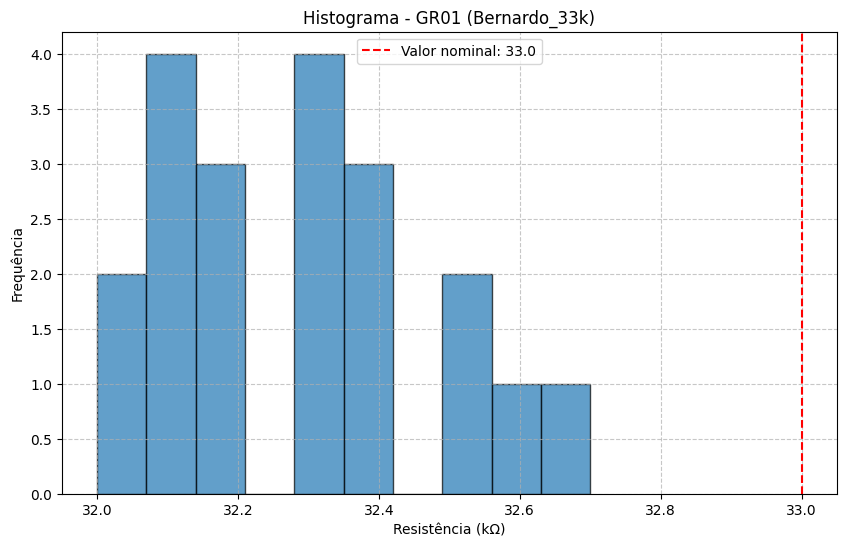

Média: 32.2850 ± 0.0437 kΩ
Desvio padrão: 0.1954 kΩ
Erro relativo: 0.61%

Análise do GR02:


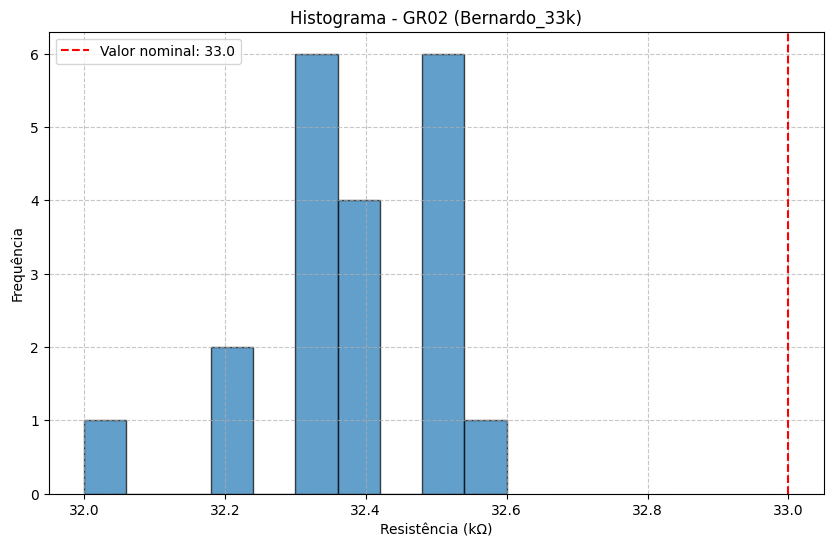

Média: 32.3700 ± 0.0317 kΩ
Desvio padrão: 0.1418 kΩ
Erro relativo: 0.44%

Análise do GR03:


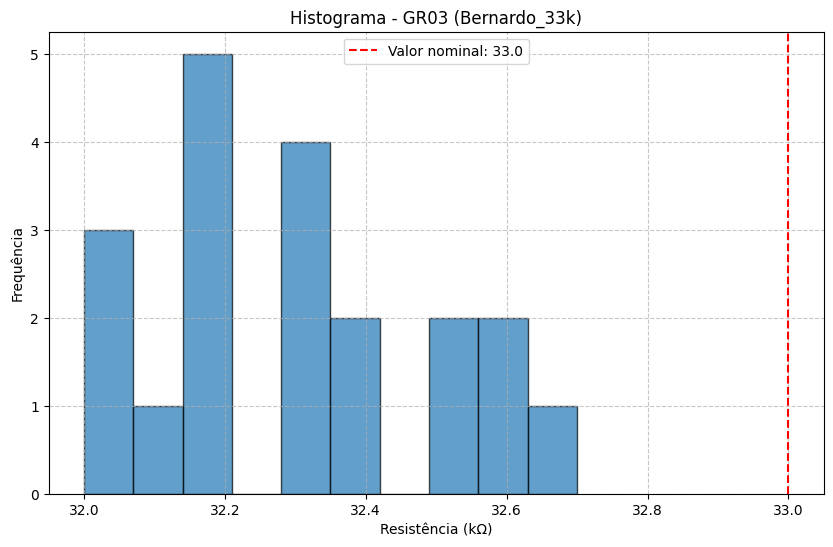

Média: 32.3000 ± 0.0459 kΩ
Desvio padrão: 0.2052 kΩ
Erro relativo: 0.64%

Análise do GR04:


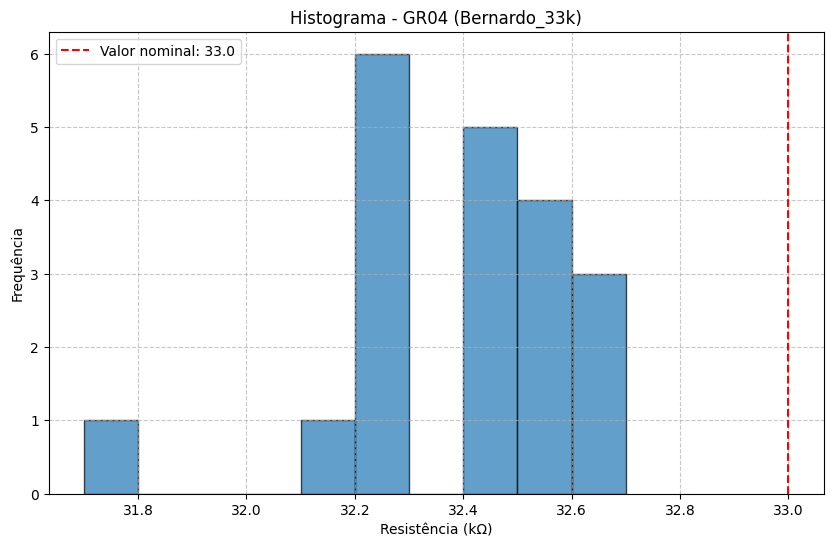

Média: 32.3750 ± 0.0512 kΩ
Desvio padrão: 0.2291 kΩ
Erro relativo: 0.71%

Análise do GR05:


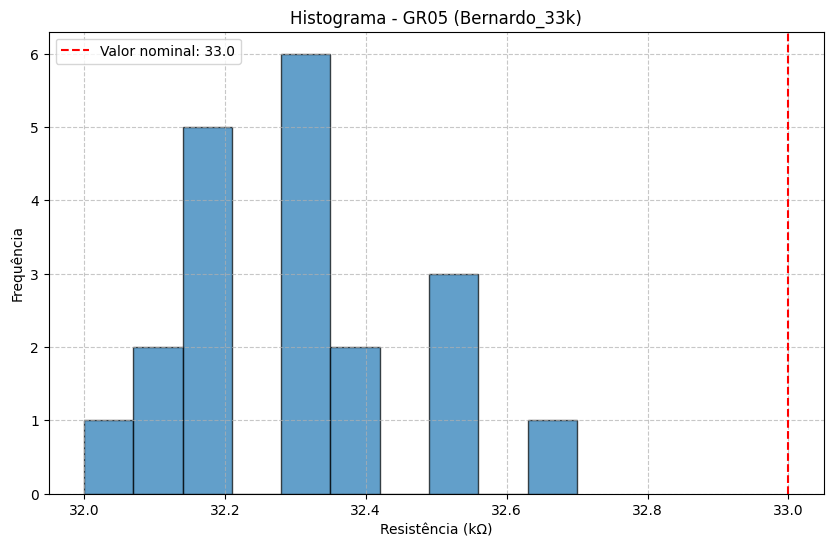

Média: 32.3000 ± 0.0370 kΩ
Desvio padrão: 0.1654 kΩ
Erro relativo: 0.51%

Análise do conjunto completo (100 medidas):


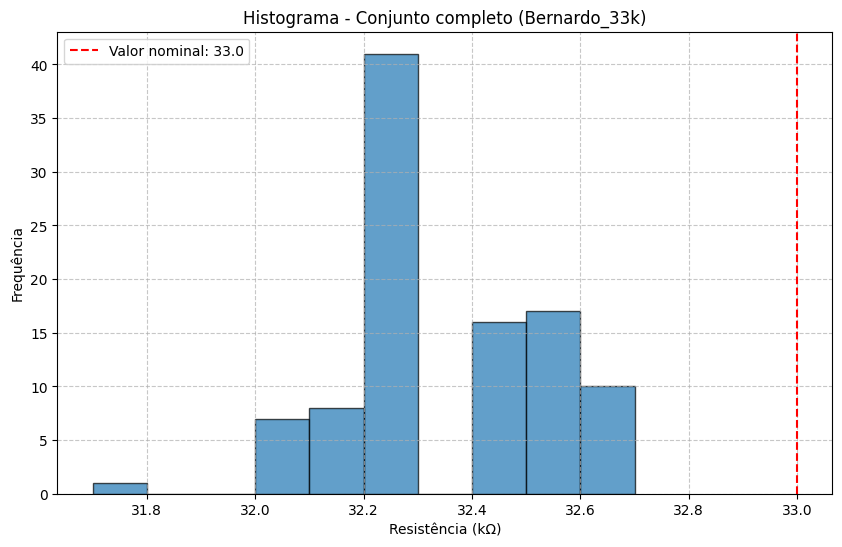

Média: 32.3260 ± 0.0190 kΩ
Desvio padrão: 0.1900 kΩ
Erro relativo: 0.59%

Comparação dos desvios padrão:
Desvios dos grupos: ['0.1954', '0.1418', '0.2052', '0.2291', '0.1654'] kΩ
Desvio do conjunto completo: 0.1900 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 2.3002 (Teórico: ~2.236)
GR02: 1.6691 (Teórico: ~2.236)
GR03: 2.4154 (Teórico: ~2.236)
GR04: 2.6971 (Teórico: ~2.236)
GR05: 1.9474 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 0.6740 kΩ
2σ: 0.0380 kΩ, 3σ: 0.0570 kΩ
Resultado: Incompatível

Análise para Julia_4.7k (Valor nominal: 4.7kΩ ±5.0%)


Análise do GR01:


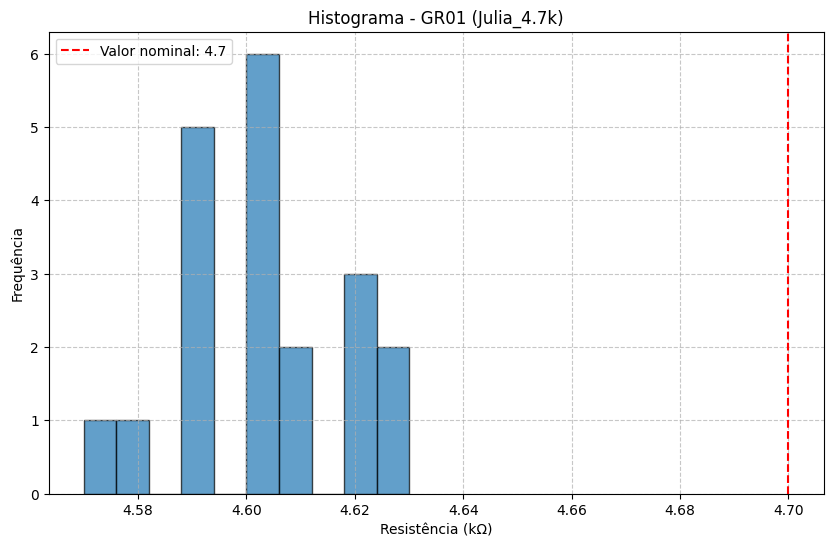

Média: 4.6020 ± 0.0036 kΩ
Desvio padrão: 0.0161 kΩ
Erro relativo: 0.35%

Análise do GR02:


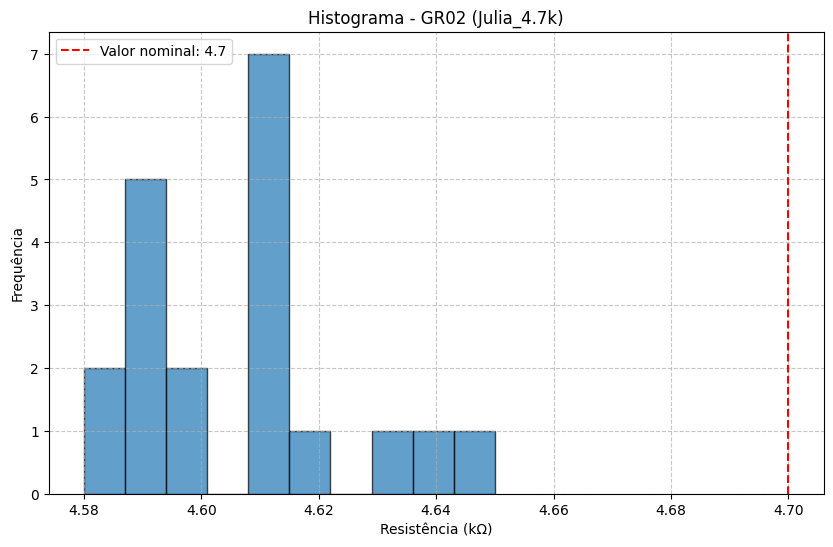

Média: 4.6060 ± 0.0042 kΩ
Desvio padrão: 0.0188 kΩ
Erro relativo: 0.41%

Análise do GR03:


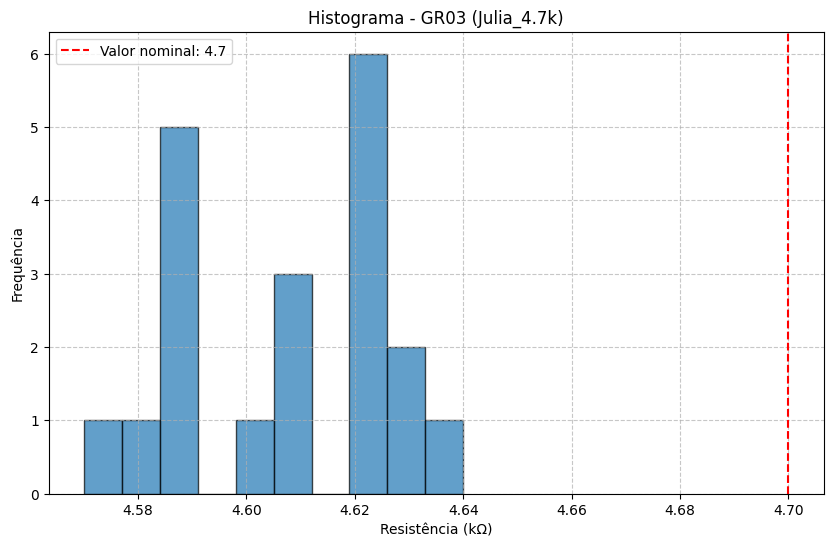

Média: 4.6075 ± 0.0042 kΩ
Desvio padrão: 0.0189 kΩ
Erro relativo: 0.41%

Análise do GR04:


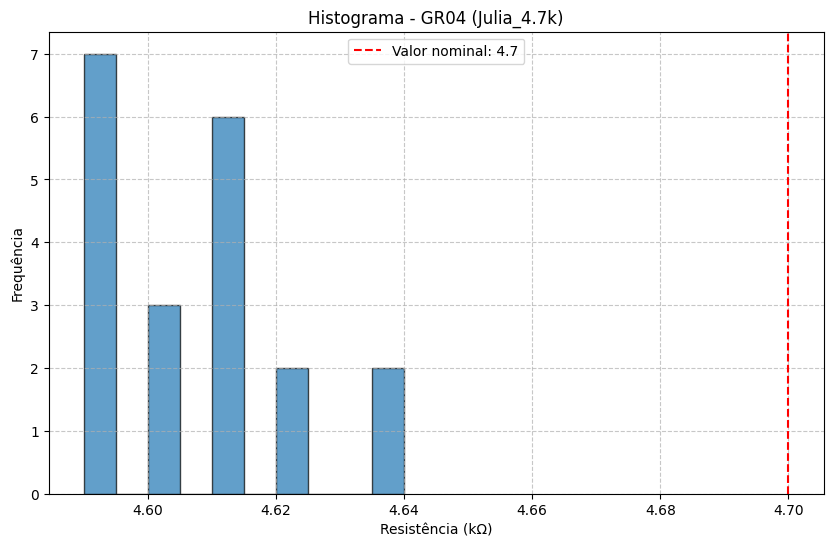

Média: 4.6055 ± 0.0035 kΩ
Desvio padrão: 0.0157 kΩ
Erro relativo: 0.34%

Análise do GR05:


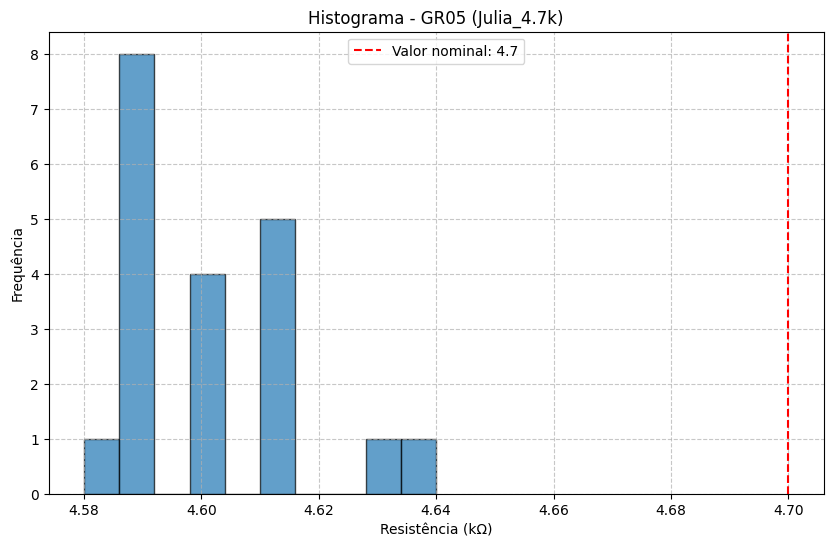

Média: 4.6010 ± 0.0033 kΩ
Desvio padrão: 0.0148 kΩ
Erro relativo: 0.32%

Análise do conjunto completo (100 medidas):


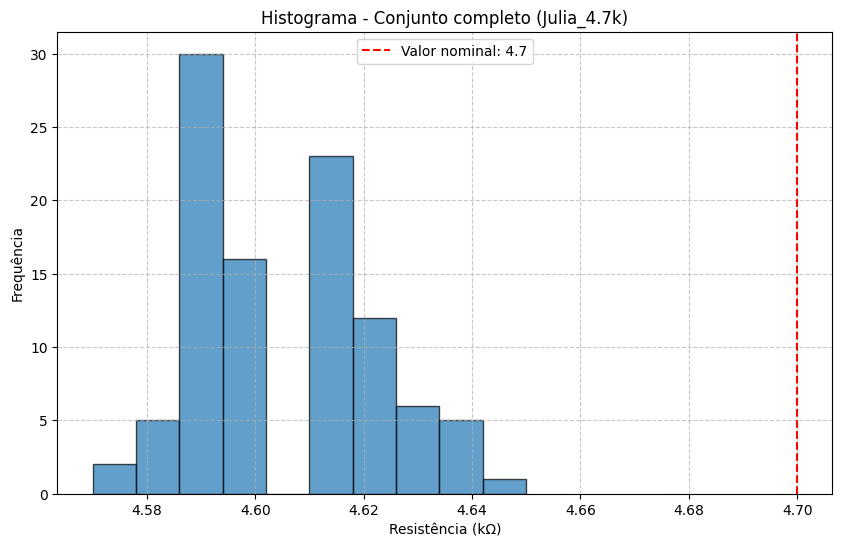

Média: 4.6044 ± 0.0017 kΩ
Desvio padrão: 0.0168 kΩ
Erro relativo: 0.36%

Comparação dos desvios padrão:
Desvios dos grupos: ['0.0161', '0.0188', '0.0189', '0.0157', '0.0148'] kΩ
Desvio do conjunto completo: 0.0168 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 2.1448 (Teórico: ~2.236)
GR02: 2.4991 (Teórico: ~2.236)
GR03: 2.5169 (Teórico: ~2.236)
GR04: 2.0952 (Teórico: ~2.236)
GR05: 1.9769 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 0.0956 kΩ
2σ: 0.0034 kΩ, 3σ: 0.0050 kΩ
Resultado: Incompatível

Análise para PedroCamila_1200k (Valor nominal: 1200.0kΩ ±5.0%)


Análise do GR01:


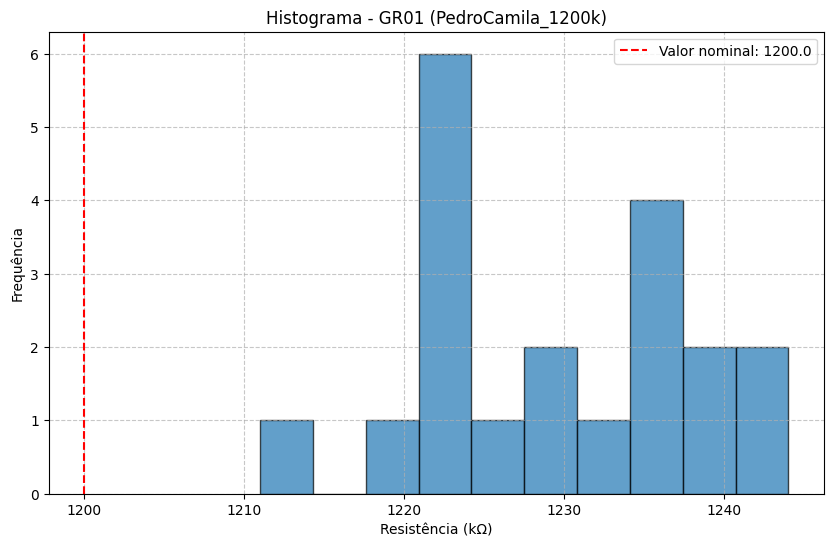

Média: 1229.4500 ± 1.9781 kΩ
Desvio padrão: 8.8465 kΩ
Erro relativo: 0.72%

Análise do GR02:


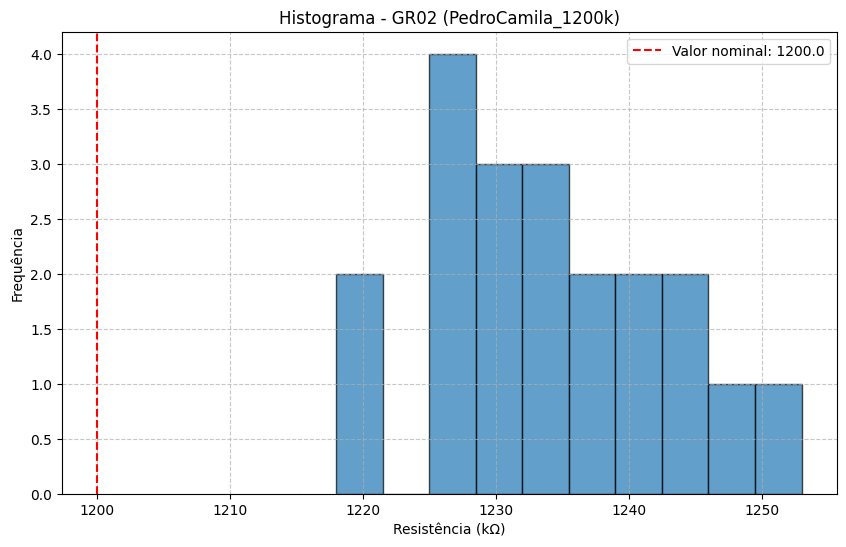

Média: 1234.1000 ± 2.0659 kΩ
Desvio padrão: 9.2389 kΩ
Erro relativo: 0.75%

Análise do GR03:


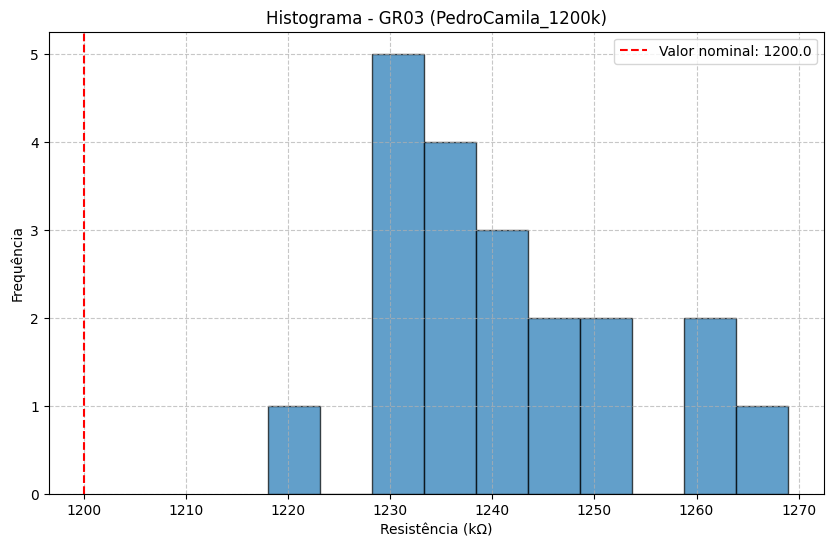

Média: 1241.9000 ± 2.8003 kΩ
Desvio padrão: 12.5232 kΩ
Erro relativo: 1.01%

Análise do GR04:


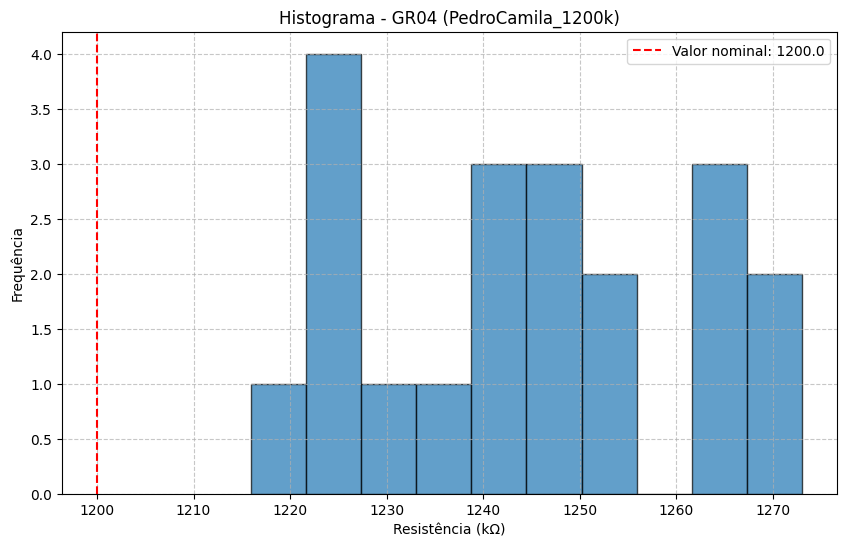

Média: 1244.0000 ± 3.9670 kΩ
Desvio padrão: 17.7408 kΩ
Erro relativo: 1.43%

Análise do GR05:


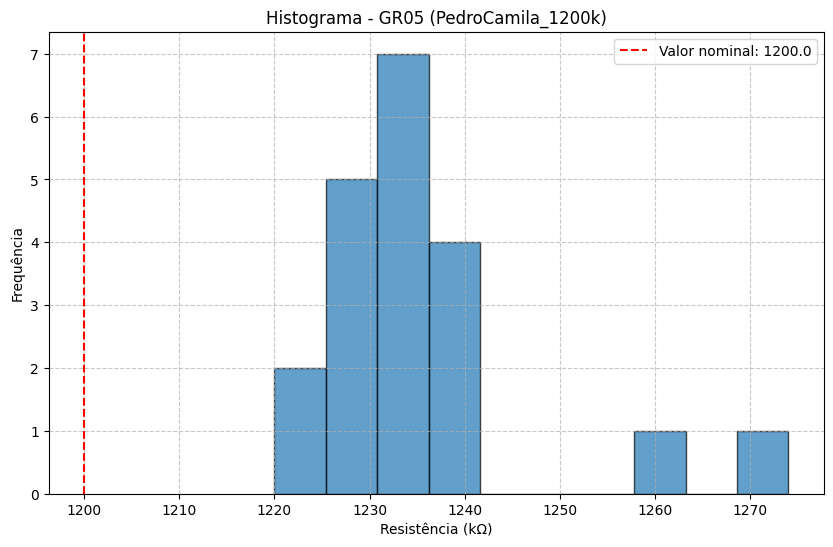

Média: 1235.5500 ± 2.7989 kΩ
Desvio padrão: 12.5173 kΩ
Erro relativo: 1.01%

Análise do conjunto completo (100 medidas):


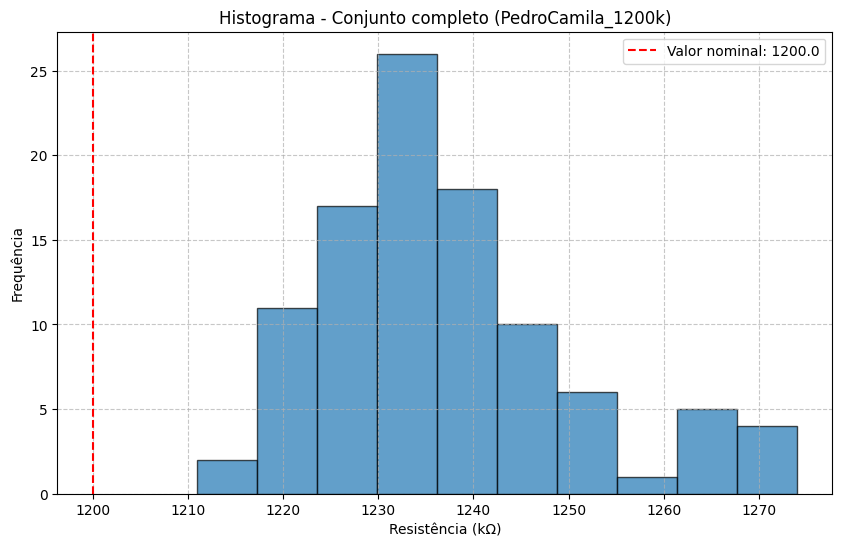

Média: 1237.0000 ± 1.3430 kΩ
Desvio padrão: 13.4300 kΩ
Erro relativo: 1.09%

Comparação dos desvios padrão:
Desvios dos grupos: ['8.8465', '9.2389', '12.5232', '17.7408', '12.5173'] kΩ
Desvio do conjunto completo: 13.4300 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Não compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 1.4729 (Teórico: ~2.236)
GR02: 1.5383 (Teórico: ~2.236)
GR03: 2.0851 (Teórico: ~2.236)
GR04: 2.9538 (Teórico: ~2.236)
GR05: 2.0841 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 37.0000 kΩ
2σ: 2.6860 kΩ, 3σ: 4.0290 kΩ
Resultado: Incompatível

Análise para Rapha_82k (Valor nominal: 82.0kΩ ±5.0%)


Análise do GR01:


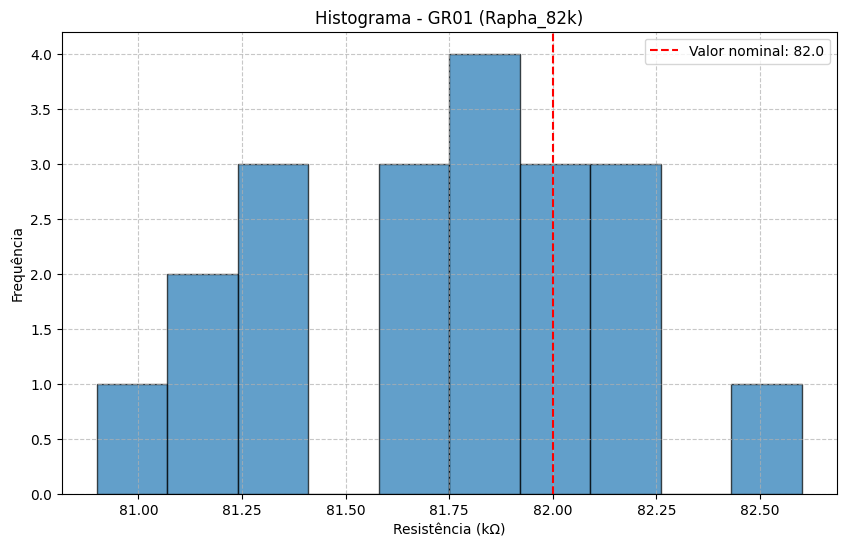

Média: 81.7500 ± 0.0939 kΩ
Desvio padrão: 0.4199 kΩ
Erro relativo: 0.51%

Análise do GR02:


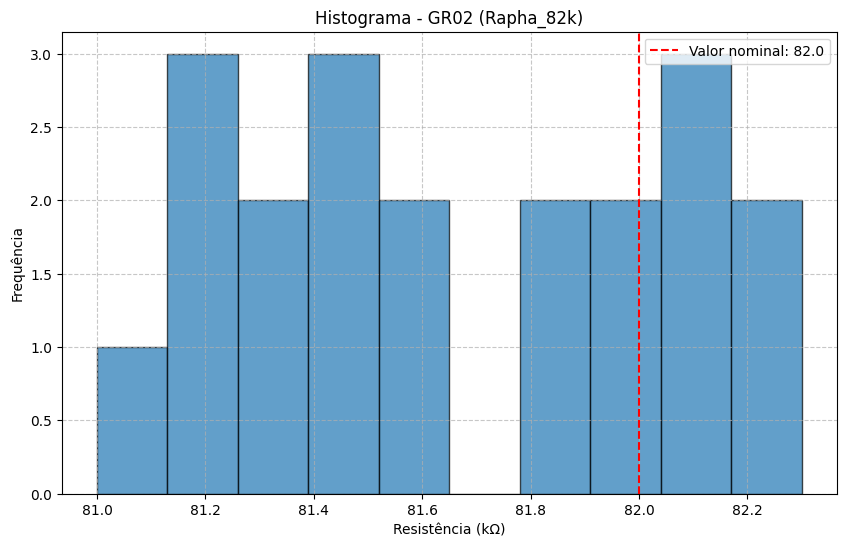

Média: 81.6650 ± 0.0907 kΩ
Desvio padrão: 0.4056 kΩ
Erro relativo: 0.50%

Análise do GR03:


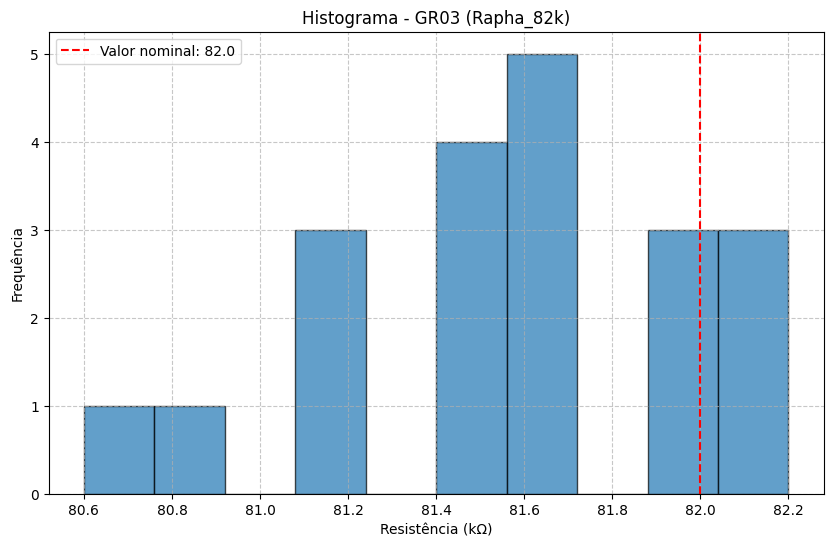

Média: 81.5700 ± 0.0987 kΩ
Desvio padrão: 0.4414 kΩ
Erro relativo: 0.54%

Análise do GR04:


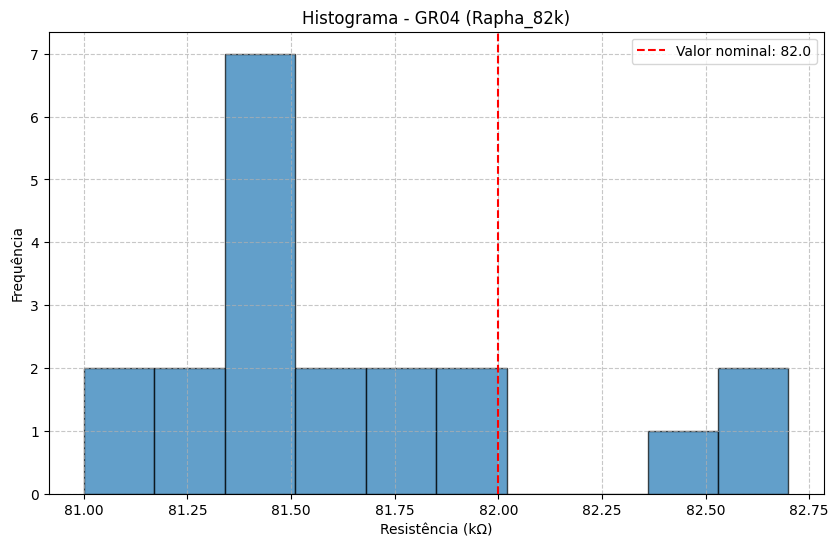

Média: 81.6450 ± 0.1037 kΩ
Desvio padrão: 0.4639 kΩ
Erro relativo: 0.57%

Análise do GR05:


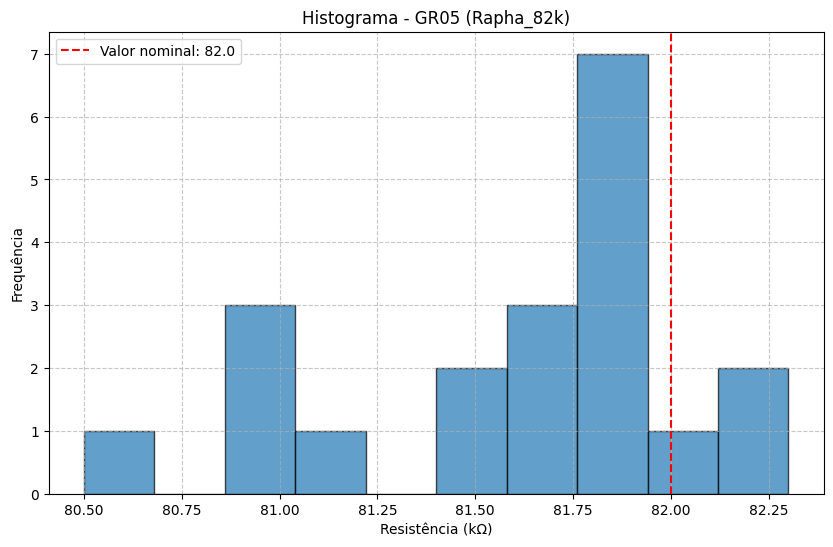

Média: 81.5750 ± 0.1051 kΩ
Desvio padrão: 0.4700 kΩ
Erro relativo: 0.58%

Análise do conjunto completo (100 medidas):


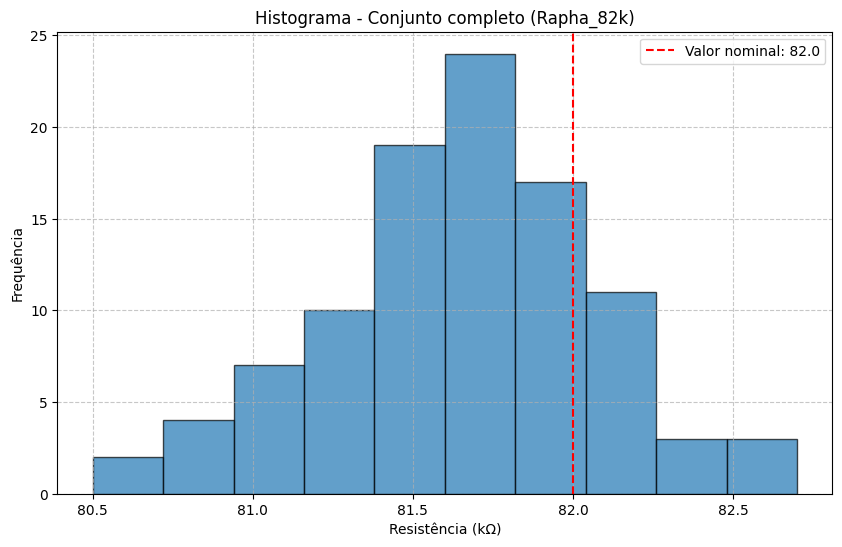

Média: 81.6410 ± 0.0437 kΩ
Desvio padrão: 0.4370 kΩ
Erro relativo: 0.54%

Comparação dos desvios padrão:
Desvios dos grupos: ['0.4199', '0.4056', '0.4414', '0.4639', '0.4700'] kΩ
Desvio do conjunto completo: 0.4370 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 2.1488 (Teórico: ~2.236)
GR02: 2.0755 (Teórico: ~2.236)
GR03: 2.2589 (Teórico: ~2.236)
GR04: 2.3742 (Teórico: ~2.236)
GR05: 2.4053 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 0.3590 kΩ
2σ: 0.0874 kΩ, 3σ: 0.1311 kΩ
Resultado: Incompatível

Análise para Angelo_750k (Valor nominal: 750.0kΩ ±5.0%)


Análise do gp1:


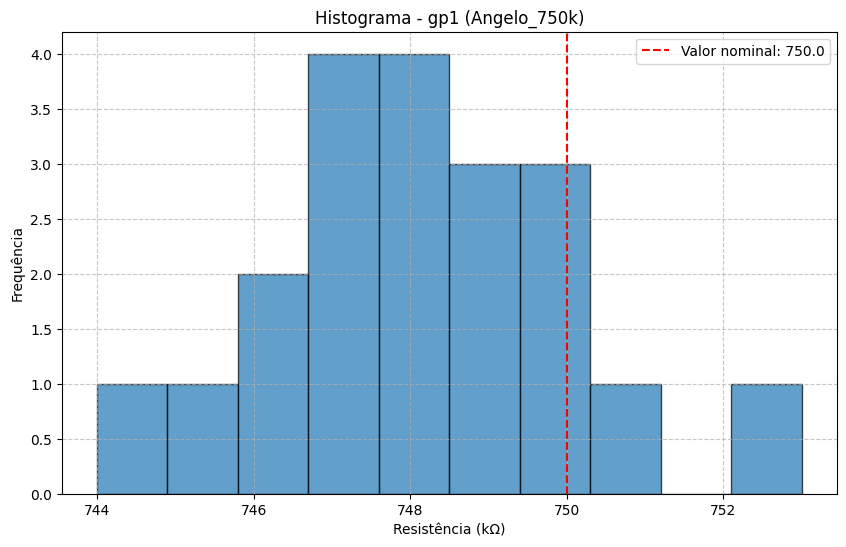

Média: 748.1000 ± 0.4752 kΩ
Desvio padrão: 2.1250 kΩ
Erro relativo: 0.28%

Análise do gp2:


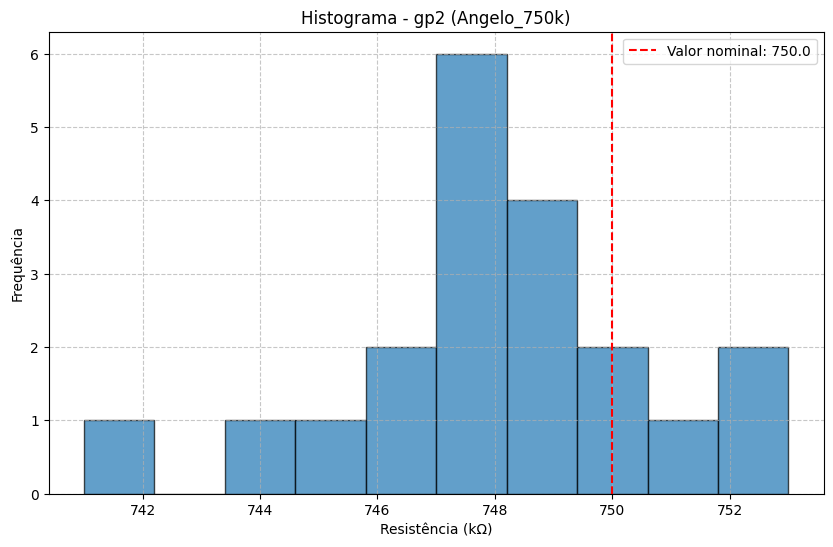

Média: 748.0500 ± 0.6176 kΩ
Desvio padrão: 2.7621 kΩ
Erro relativo: 0.37%

Análise do gp3:


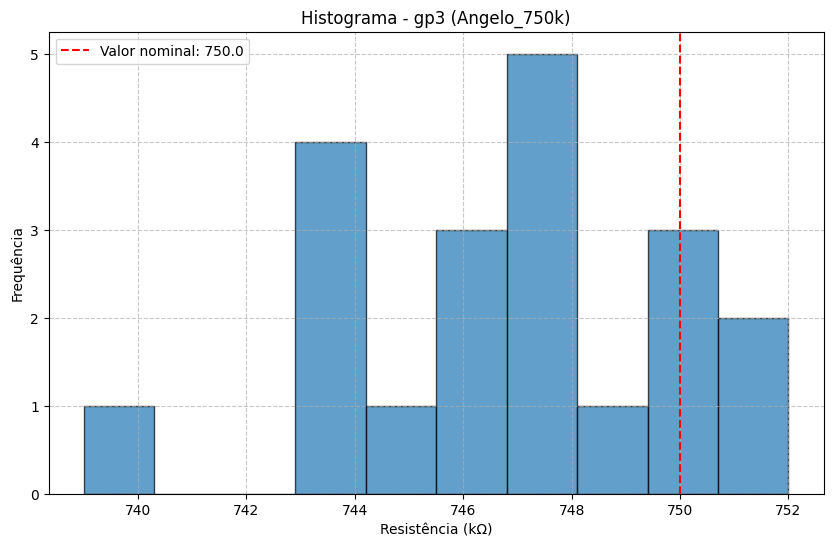

Média: 746.8500 ± 0.7044 kΩ
Desvio padrão: 3.1502 kΩ
Erro relativo: 0.42%

Análise do gp4:


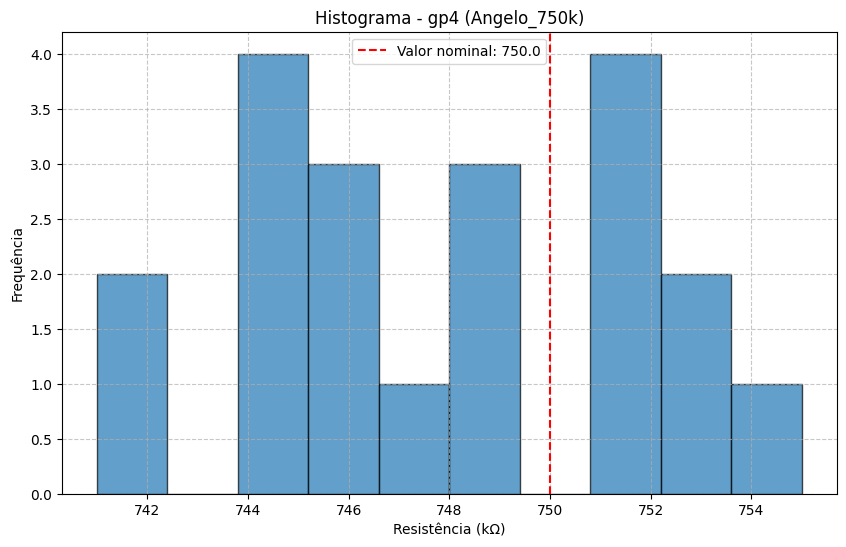

Média: 748.0000 ± 0.8944 kΩ
Desvio padrão: 4.0000 kΩ
Erro relativo: 0.53%

Análise do gp5:


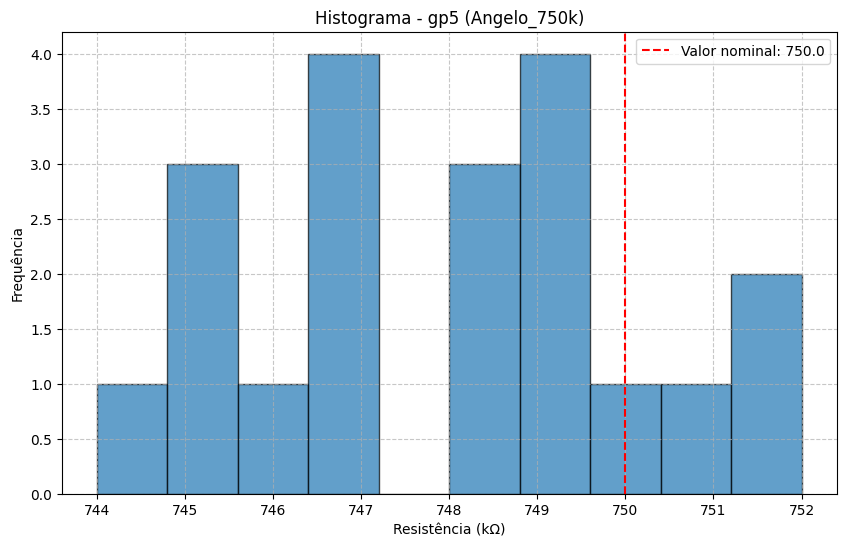

Média: 747.9000 ± 0.5125 kΩ
Desvio padrão: 2.2919 kΩ
Erro relativo: 0.31%

Análise do conjunto completo (100 medidas):


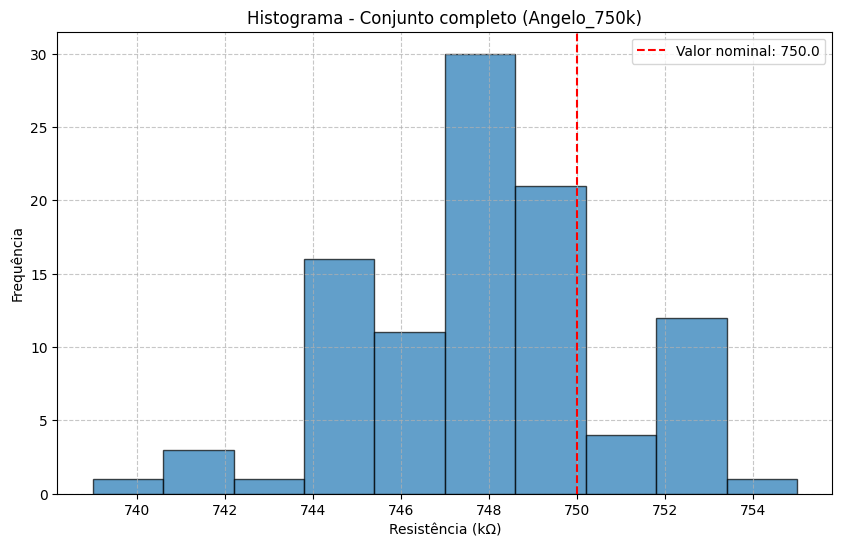

Média: 747.7800 ± 0.2922 kΩ
Desvio padrão: 2.9218 kΩ
Erro relativo: 0.39%

Comparação dos desvios padrão:
Desvios dos grupos: ['2.1250', '2.7621', '3.1502', '4.0000', '2.2919'] kΩ
Desvio do conjunto completo: 2.9218 kΩ

Compatibilidade entre grupos e conjunto completo:
gp1: Compatível
gp2: Compatível
gp3: Compatível
gp4: Compatível
gp5: Compatível

Razão entre erros da média (grupo/completo):
gp1: 1.6263 (Teórico: ~2.236)
gp2: 2.1138 (Teórico: ~2.236)
gp3: 2.4108 (Teórico: ~2.236)
gp4: 3.0612 (Teórico: ~2.236)
gp5: 1.7540 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 2.2200 kΩ
2σ: 0.5844 kΩ, 3σ: 0.8765 kΩ
Resultado: Incompatível

Análise para BernardoGabrielRayan_22k (Valor nominal: 22.0kΩ ±5.0%)


Análise do GR01:


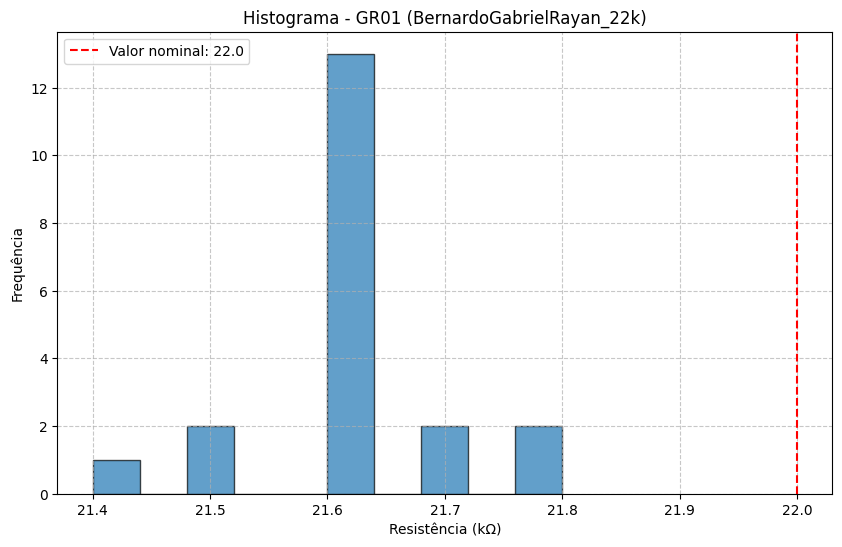

Média: 21.6100 ± 0.0204 kΩ
Desvio padrão: 0.0912 kΩ
Erro relativo: 0.42%

Análise do GR02:


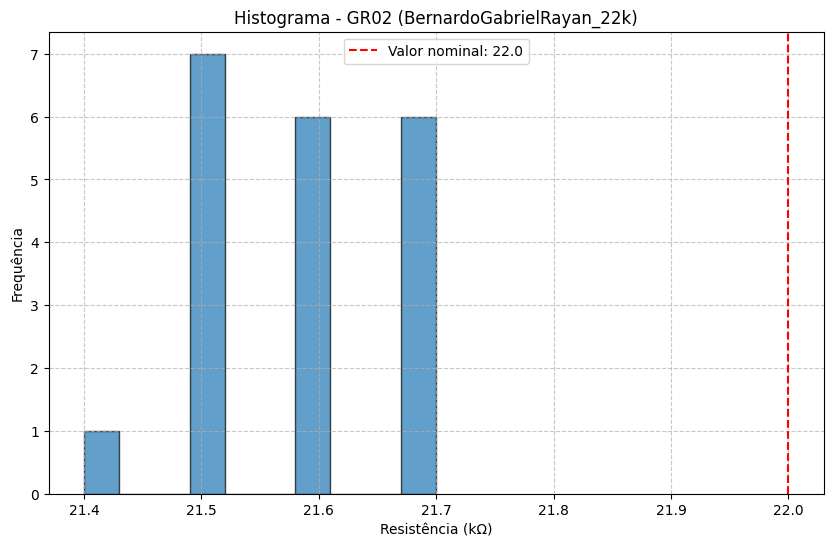

Média: 21.5850 ± 0.0209 kΩ
Desvio padrão: 0.0933 kΩ
Erro relativo: 0.43%

Análise do GR03:


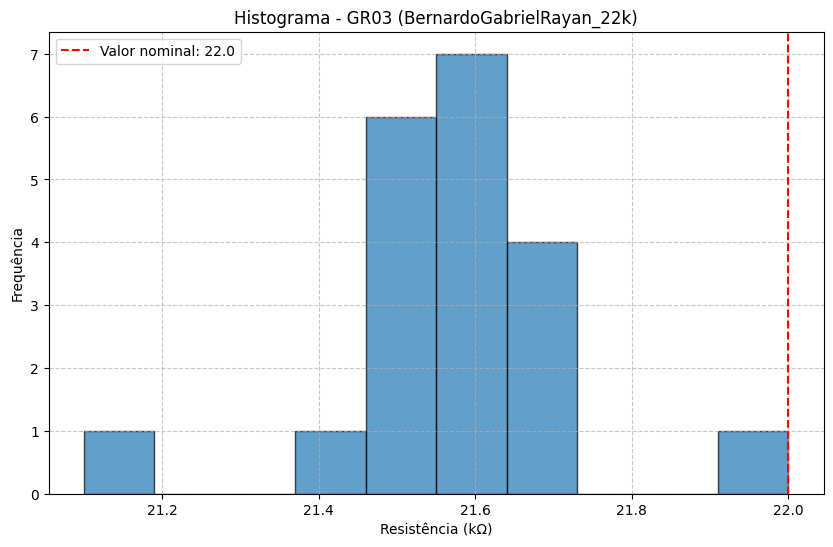

Média: 21.5750 ± 0.0376 kΩ
Desvio padrão: 0.1682 kΩ
Erro relativo: 0.78%

Análise do GR04:


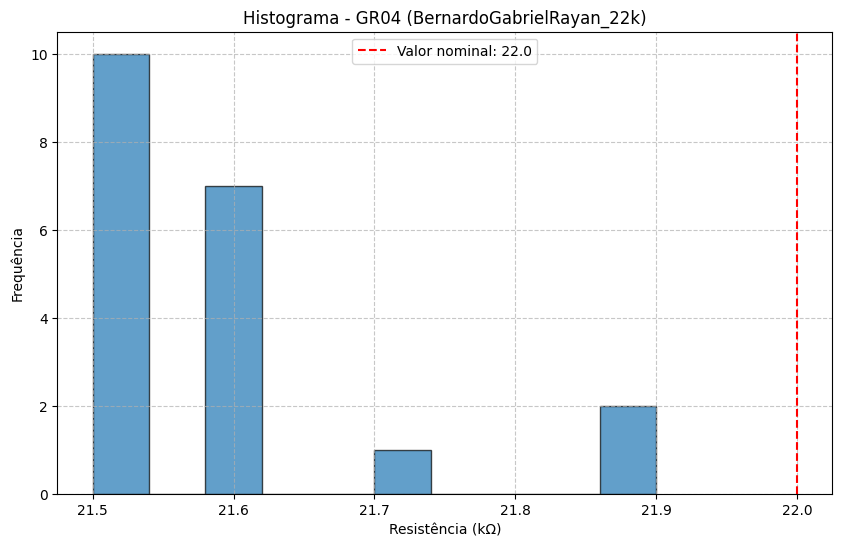

Média: 21.5850 ± 0.0274 kΩ
Desvio padrão: 0.1226 kΩ
Erro relativo: 0.57%

Análise do GR05:


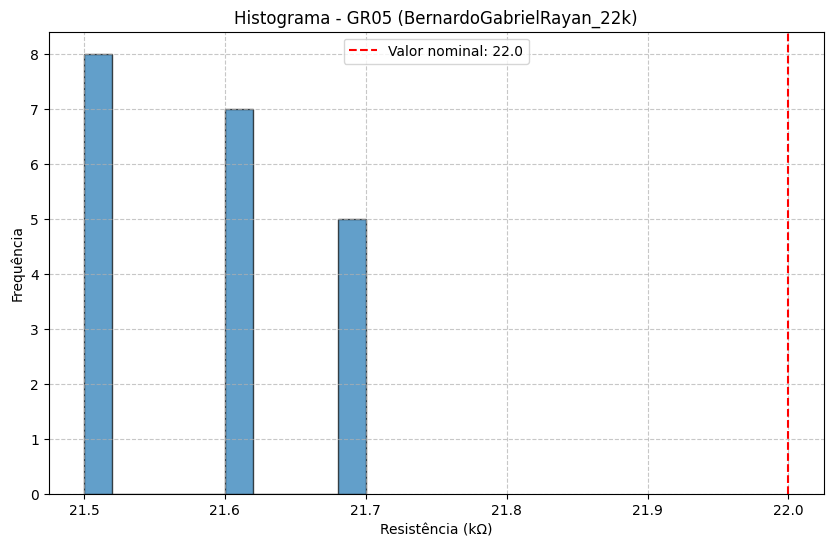

Média: 21.5850 ± 0.0182 kΩ
Desvio padrão: 0.0813 kΩ
Erro relativo: 0.38%

Análise do conjunto completo (100 medidas):


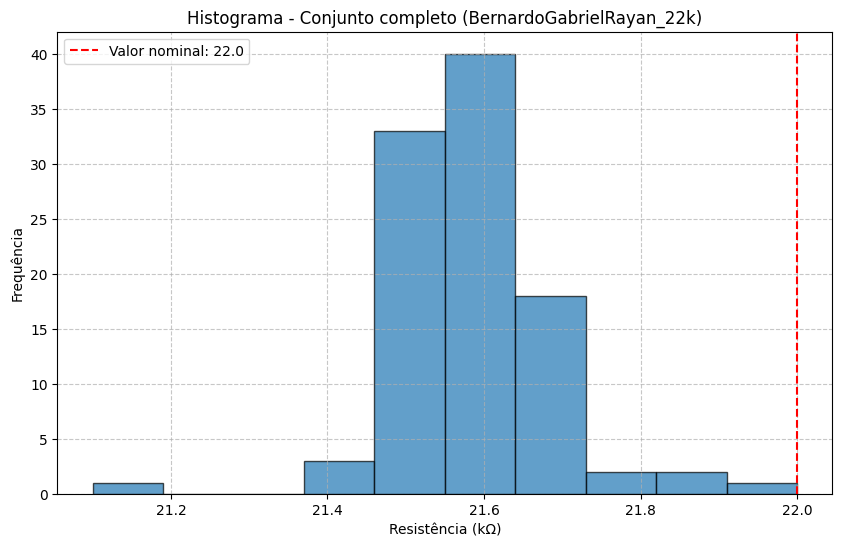

Média: 21.5880 ± 0.0114 kΩ
Desvio padrão: 0.1140 kΩ
Erro relativo: 0.53%

Comparação dos desvios padrão:
Desvios dos grupos: ['0.0912', '0.0933', '0.1682', '0.1226', '0.0813'] kΩ
Desvio do conjunto completo: 0.1140 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 1.7894 (Teórico: ~2.236)
GR02: 1.8314 (Teórico: ~2.236)
GR03: 3.3004 (Teórico: ~2.236)
GR04: 2.4053 (Teórico: ~2.236)
GR05: 1.5948 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 0.4120 kΩ
2σ: 0.0228 kΩ, 3σ: 0.0342 kΩ
Resultado: Incompatível

Análise para SamaraKaylane_82k (Valor nominal: 82.0kΩ ±5.0%)


Análise do GR01:


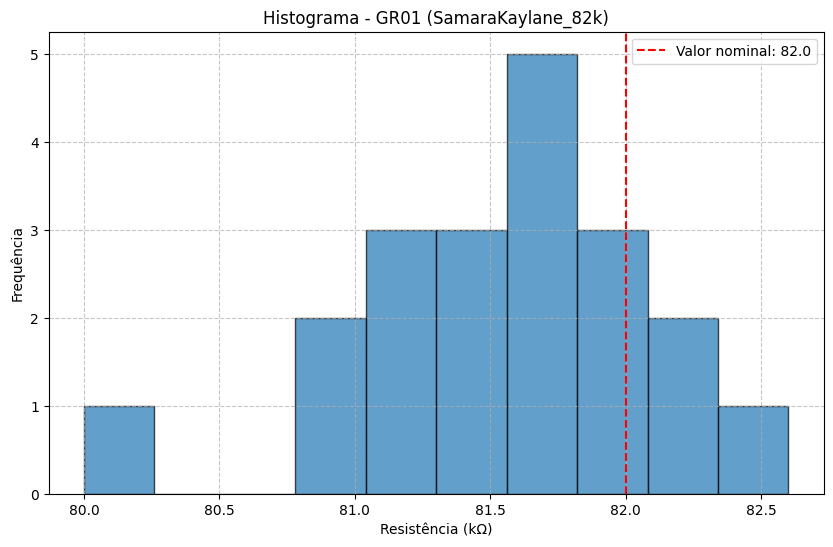

Média: 81.5250 ± 0.1265 kΩ
Desvio padrão: 0.5656 kΩ
Erro relativo: 0.69%

Análise do GR02:


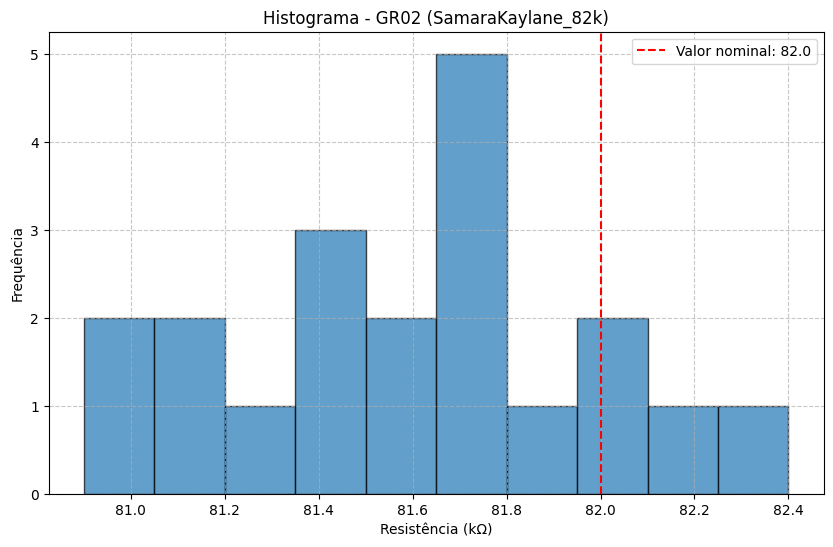

Média: 81.6000 ± 0.0906 kΩ
Desvio padrão: 0.4052 kΩ
Erro relativo: 0.50%

Análise do GR03:


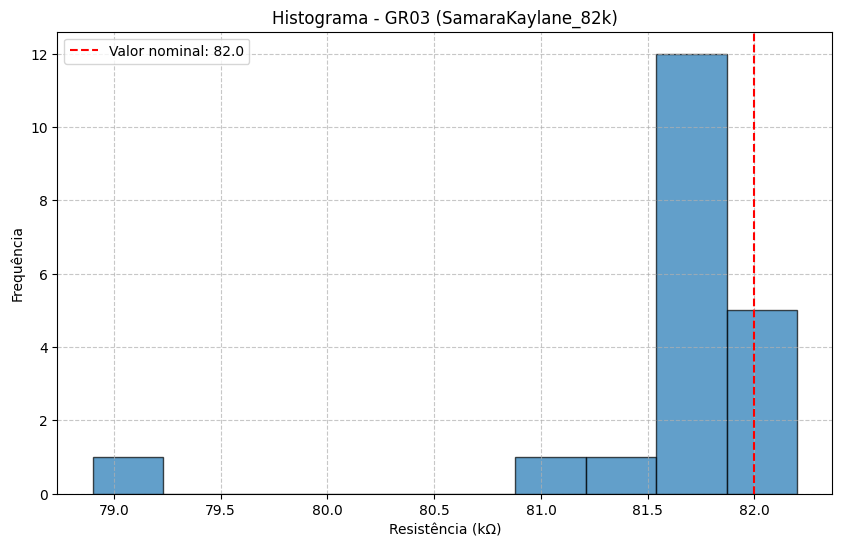

Média: 81.5950 ± 0.1516 kΩ
Desvio padrão: 0.6778 kΩ
Erro relativo: 0.83%

Análise do GR04:


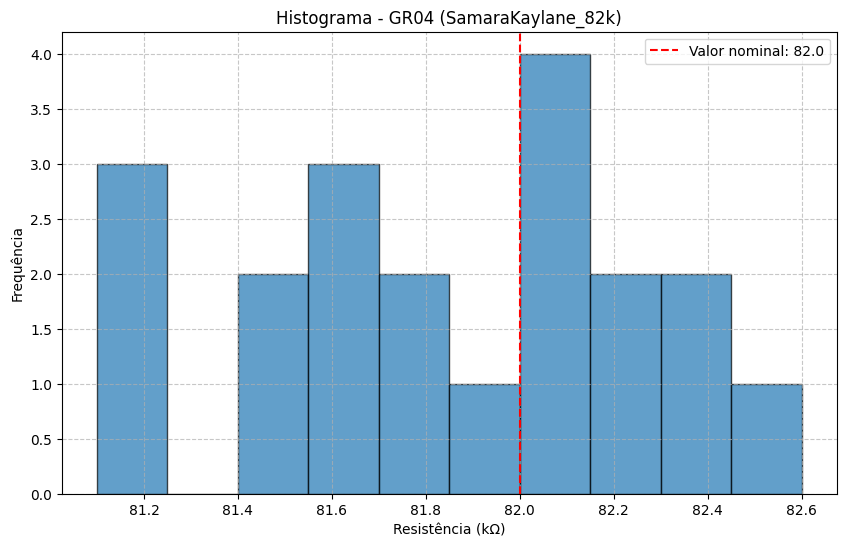

Média: 81.8300 ± 0.0954 kΩ
Desvio padrão: 0.4269 kΩ
Erro relativo: 0.52%

Análise do GR05:


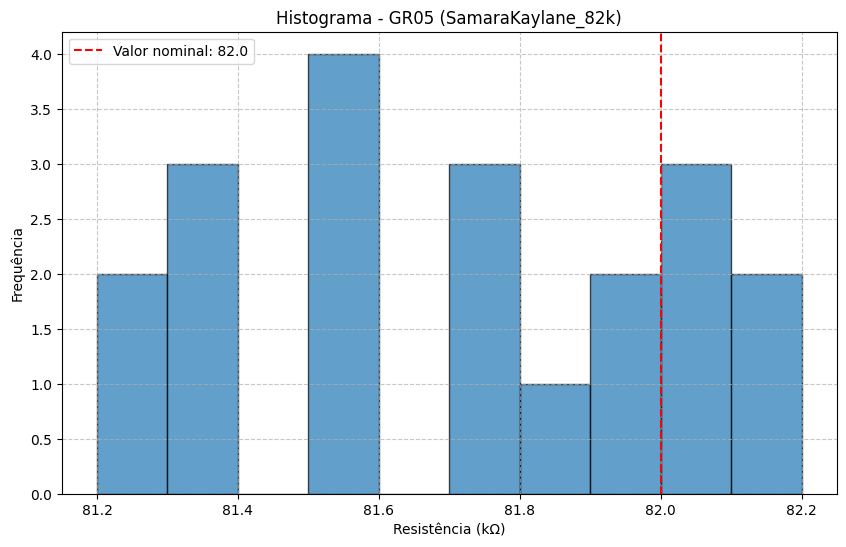

Média: 81.6800 ± 0.0713 kΩ
Desvio padrão: 0.3189 kΩ
Erro relativo: 0.39%

Análise do conjunto completo (100 medidas):


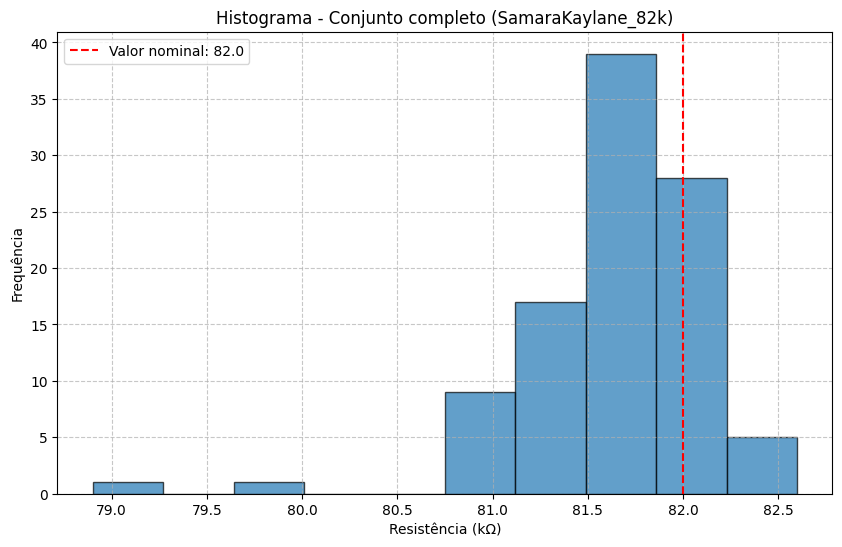

Média: 81.6460 ± 0.0497 kΩ
Desvio padrão: 0.4965 kΩ
Erro relativo: 0.61%

Comparação dos desvios padrão:
Desvios dos grupos: ['0.5656', '0.4052', '0.6778', '0.4269', '0.3189'] kΩ
Desvio do conjunto completo: 0.4965 kΩ

Compatibilidade entre grupos e conjunto completo:
GR01: Compatível
GR02: Compatível
GR03: Compatível
GR04: Compatível
GR05: Compatível

Razão entre erros da média (grupo/completo):
GR01: 2.5469 (Teórico: ~2.236)
GR02: 1.8249 (Teórico: ~2.236)
GR03: 3.0525 (Teórico: ~2.236)
GR04: 1.9223 (Teórico: ~2.236)
GR05: 1.4360 (Teórico: ~2.236)

Compatibilidade da média com o valor nominal do fabricante (regra prática):
Discrepância: 0.3540 kΩ
2σ: 0.0993 kΩ, 3σ: 0.1490 kΩ
Resultado: Incompatível


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calcular_estatisticas(dados):
    """Calcula estatísticas básicas de um conjunto de dados"""
    media = np.mean(dados)
    desvio_padrao = np.std(dados, ddof=1)  # Desvio padrão amostral
    n = len(dados)
    erro_medio = desvio_padrao / np.sqrt(n)
    erro_relativo = (desvio_padrao / media) * 100  # Em percentagem

    return {
        'media': media,
        'desvio_padrao': desvio_padrao,
        'erro_medio': erro_medio,
        'erro_relativo': erro_relativo,
        'n': n
    }

def plot_histograma(dados, titulo, valor_nominal=None):
    """Cria um histograma para um conjunto de dados"""
    plt.figure(figsize=(10, 6))
    plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)

    if valor_nominal is not None:
        plt.axvline(valor_nominal, color='red', linestyle='--',
                   label=f'Valor nominal: {valor_nominal}')

    plt.title(titulo)
    plt.xlabel('Resistência (kΩ)')
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

def verificar_compatibilidade(media1, erro1, media2, erro2):
    """Verifica se duas estimativas são compatíveis dentro de seus intervalos de erro"""
    diferenca = abs(media1 - media2)
    incerteza_combinada = np.sqrt(erro1**2 + erro2**2)
    z = diferenca / incerteza_combinada
    # Considerando 95% de confiança (z < 1.96 para ser compatível)
    return z < 2.0

def analisar_resistores(dados_resistores, chave):
    """Realiza todas as análises para um conjunto de resistores"""
    dados = dados_resistores[chave]
    valor_nominal = dados['valor_nominal']
    tolerancia = dados['tolerancia']

    # Juntar todos os dados
    todos_dados = []
    for grupo in dados['grupos'].values():
        todos_dados.extend(grupo)
    todos_dados = np.array(todos_dados)

    print(f"\n{'='*50}")
    print(f"Análise para {chave} (Valor nominal: {valor_nominal}kΩ ±{tolerancia*100}%)")
    print(f"{'='*50}\n")

    # 1. Análise para cada grupo de 20 medidas
    estatisticas_grupos = {}
    for nome_grupo, grupo_dados in dados['grupos'].items():
        print(f"\nAnálise do {nome_grupo}:")
        stats = calcular_estatisticas(grupo_dados)
        estatisticas_grupos[nome_grupo] = stats

        # 1a. Histograma
        plot_histograma(grupo_dados, f"Histograma - {nome_grupo} ({chave})", valor_nominal)

        # 1b. Estatísticas
        print(f"Média: {stats['media']:.4f} ± {stats['erro_medio']:.4f} kΩ")
        print(f"Desvio padrão: {stats['desvio_padrao']:.4f} kΩ")
        print(f"Erro relativo: {stats['erro_relativo']:.2f}%")

    # 2. Análise para o conjunto completo (100 medidas)
    print("\nAnálise do conjunto completo (100 medidas):")
    stats_completo = calcular_estatisticas(todos_dados)
    plot_histograma(todos_dados, f"Histograma - Conjunto completo ({chave})", valor_nominal)
    print(f"Média: {stats_completo['media']:.4f} ± {stats_completo['erro_medio']:.4f} kΩ")
    print(f"Desvio padrão: {stats_completo['desvio_padrao']:.4f} kΩ")
    print(f"Erro relativo: {stats_completo['erro_relativo']:.2f}%")

    # 3. Comparação dos desvios padrão
    print("\nComparação dos desvios padrão:")
    desvios = [stats['desvio_padrao'] for stats in estatisticas_grupos.values()]
    print(f"Desvios dos grupos: {[f'{d:.4f}' for d in desvios]} kΩ")
    print(f"Desvio do conjunto completo: {stats_completo['desvio_padrao']:.4f} kΩ")

    # 4. Verificar compatibilidade entre grupos e conjunto completo
    print("\nCompatibilidade entre grupos e conjunto completo:")
    for nome_grupo, stats in estatisticas_grupos.items():
        compativel = verificar_compatibilidade(
            stats['media'], stats['erro_medio'],
            stats_completo['media'], stats_completo['erro_medio']
        )
        print(f"{nome_grupo}: {'Compatível' if compativel else 'Não compatível'}")

    # 5. Razão entre erros da média
    #razão entre o erro da média de cada grupo e o erro da média do total deve ser aproximadamente igual a \sqrt{k}

    print("\nRazão entre erros da média (grupo/completo):")
    for nome_grupo, stats in estatisticas_grupos.items():
        razao = stats['erro_medio'] / stats_completo['erro_medio']
        # Teoricamente, para n=20 vs n=100, esperamos sqrt(100/20) ≈ 2.236
        print(f"{nome_grupo}: {razao:.4f} (Teórico: ~2.236)")

    # 6. Comparação com a tolerância do fabricante
    '''print("\nComparação com a tolerância do fabricante:")
    limite_superior = valor_nominal * (1 + tolerancia)
    limite_inferior = valor_nominal * (1 - tolerancia)
    print(f"Faixa esperada: [{limite_inferior:.2f}, {limite_superior:.2f}] kΩ")

    dentro_tolerancia = (limite_inferior <= stats_completo['media'] <= limite_superior)
    print(f"Média dentro da tolerância? {'Sim' if dentro_tolerancia else 'Não'}")

    # Verificar quantas medidas individuais estão dentro da tolerância
    dentro = sum((limite_inferior <= d <= limite_superior) for d in todos_dados)
    print(f"Medidas dentro da tolerância: {dentro}/{len(todos_dados)} ({dentro/len(todos_dados)*100:.1f}%)")

'''
    # 7. Compatibilidade da média com o valor nominal do fabricante (regra prática)
    print("\nCompatibilidade da média com o valor nominal do fabricante (regra prática):")

    discrepancia = abs(stats_completo['media'] - valor_nominal)
    erro_medio = stats_completo['erro_medio']

    if discrepancia < 2 * erro_medio:
        resultado = 'Compatível'
    elif discrepancia > 3 * erro_medio:
        resultado = 'Incompatível'
    else:
        resultado = 'Inconclusivo'

    print(f"Discrepância: {discrepancia:.4f} kΩ")
    print(f"2σ: {2*erro_medio:.4f} kΩ, 3σ: {3*erro_medio:.4f} kΩ")
    print(f"Resultado: {resultado}")
# Executar a análise para cada conjunto de resistores
for chave in dados_resistores.keys():
    analisar_resistores(dados_resistores, chave)